# Declaration of Originality

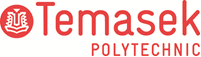

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Melissa Kuah 2404487G
* Tutorial Group                : P01
* Tutor						    : Mr Ruchir SRIVASTAVA
* Submission Date               : 11 February 2026 0900

**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# 1. Project Summary 

**Business Problem:** 

In real-world scenarios, it is often that Banks already identify wealthy customers & long-term customers (customers of higher-value, who demonstrate LOYALTY) and often have dedicated relationship managers (RMs) assigned to manage these relationships with these distinguished customers. However, being a wealthy or long-term customer may not necessarily mean wanting a term deposit.

**Potential Scenario**: A Relationship Manager may have 500 priority customers to manage. BUT potential limitations:

1. They can only call a limited number of customers per day (DEPENDING ON THEIR WORKING SPEED) since manpower is low and they are just one person
2. Furthermore, **based on my analysis done in this jupyter notebook**, only around 11% of customers actually want term deposits. (which is target variable = yes)
3. Therefore, calling each customer individually wastes time on **uninterested customers**, lose situation as it reduces productivity.

**The Challenge:** Among the bank's customer base, **WHO** actually **wants** a term deposit?

**Solution:** I designed a Streamlit web application which is powered by a trained ML classification model to predict whether a customer is **likely to subscribe** to a term deposit **BEFORE the call is made**. This is beneficial for relationship managers since they are able to identify **HIGH-PROBABILITY CUSTOMERS** and **prioritise their time and resources carefully** rather than calling randomly. 

**The ML classification model predicts using:**

1. Demographic features (age, job, marital status, education)
2. Financial features (credit default, housing loan, personal loan)
3. Campaign history (contact type, month, day of week, previous contacts, previous outcome)
4. Economic indicators (employment variation rate, consumer price index, consumer confidence index, euribor 3-month rate, number of employees)
5. 5 engineered features (age group, contacted before, previous success, economic condition, contact recency)
4. **DROPPED duration & campaign** to prevent data leakage (elaboration below)

**Key Results:**

1. Best Model Identified after training: Random Forest with tuned hyperparameters
2. F1-Score: 48.58% 
3. Recall: 52.37% 
4. Subscribers Found: 729 out of 1,392 potential subscribers 
5. Business Impact: Finds more potential subscribers identified per campaign after tuning

# 2. Background/Context: Term Deposits in Banking 

**What is a term deposit ?** 

A term deposit (also known as a Fixed Deposit) is when a customer locks their money in the bank for a fixed period (e.g.6, 12, 24 months) in exchange for a higher interest rate.

**Why Banks Actively Promote Term Deposits ?**

1. **Guaranteed Funds**: Unlike savings accounts where customers can withdraw anytime, term deposits give banks **guaranteed access to funds** for a **fixed period**.
2. **Profit Margin**: Banks pay customers interest on term deposits at a lower rate, but they can lend that money to the borrower at a higher rate. The difference in the interest then makes the bank profit.
3. **Business Stability**: Predictable funds can help banks plan their lending and investments better.

**Why Customers Subscribe ?**

1. **Higher Interest**: It is because **term deposits** offer **significantly better returns** than **basic savings accounts**. 
2. **Safe Investment**: This is because customers are insured up to $100,000 under SDIC in Singapore.
   Link of source findings: https://www.straitstimes.com/business what-does-hike-in-insurance-coverage-on-bank-deposits-to-100000-mean-for-you
3. **Discipline**: This is because the money is locked in (fixed deposit), which is beneficial for preventing impulsive spending.
4. **Guaranteed Returns**: Instead of just not making use of the money, you can put in fixed deposit and banks guarantee higher returns based on interest.

**When Do Banks Actually Call Customers?**

**Phone Calls Are Still Used In Banking!**

While digital marketing is more common today, banks **still use phone calls** for **high-value scenarios**:

1. **Priority Banking**: RMs call wealthy clients to **discuss financial plans** and **build relationships** with customers
2. **Term Deposit Maturity Renewals**: Banks call customers when their Fixed Deposit is **maturing** to ask if they want to **renew**.
3. **Follow-ups**: A customer had previously **showed interest online or in-branch**, and the bank calls to follow up.

Despite different countries, the core problem still remains the same: RMs have **limited time**, and **not every customer they call will be interested**.

**Singapore Context: The Scam Problem**

Link of Reference: https://www.straitstimes.com/singapore/fixed-deposit-scam-boasting-high-interest-rates-claims-12-victims-losses-amounting-650000

In Singapore, there have been news articles of scam calls impersonating banks which is a **growing concern**. Scammers will frequently pose as bank representatives, asking people to sign up for financial products like term deposits. 

This has therefore made Singaporeans increasingly wary of unsolicited and sudden bank calls, despite some being genuine.

All in all, this makes consent-based calling ever so necessary:

1. Customers who have not given consent are **far more likely** to dismiss or report the call as a potential scam.
2. Random calls to uninterested customers **wastes resources and manpower**.
3. RMs calling pre-qualified, high-probability customers who are open to discuss such financial products leads to **better conversations, relationships and a higher conversion**.

**Assumptions made in this project:**

1. I will assume that the customer base has **given consent** under **PDPA (Personal Data Protection Act)** in Singapore for the bank to contact them regarding financial products. This model is designed to help banks prioritise among **consenting** customers, not to enable **unsolicited outreach**.

OVERALL: BankConvert AI (Name of Application) helps RMs focus their **limited time** on customers who are **most likely to subscribe**, most importantly, within a framework of trust and consent.

# 3. Business Understanding

**Problem Statement:**

A Portuguese banking institution conducts direct marketing campaigns to **promote term deposit subscriptions**. The current approach involves **contacting customers via phone without prior qualification**, resulting in:

1. **Low conversion rate:** Only around 11% of contacted customers subscribe
2. **High operational costs:** Each call costs time and resources
3. **Customer fatigue:** Repeated unsuccessful contacts damage customer relationships as it's annoying to repeatedly receive calls that you are uninterested in. **(ESPECIALLY: In Singapore where scam-wary customers may view frequent calls negatively)**

**Business Objective:**

I aimed to develop a predictive model that identifies customers **most likely to subscribe to a term deposit**, enabling:

1. **Targeted marketing:** Focus resources on **high-probability customers**
2. **Cost reduction:** Reduce wasted calls on **low-probability prospects**
3. **Improved ROI:** Increase conversion rates while reducing campaign costs (via reduction in calling randomly)

**Feature Exclusions:**

**WHY NOT DURATION ?** Duration cannot be used. Although call duration has a **strong correlation with the target variable**, it represents **data leakage** and **contributes to inaccurate prediction**. This is because call duration is **only known AFTER the call ends**, but the model needs to predict **BEFORE !!** making the call, since we want to predict b4 to seeve out the people who will subscribe to the term deposit and **not waste time and resources**.

**WHY NOT CAMPAIGN?** Campaign cannot be used as well since Campaign represents the number of times the bank called the customer **during** this marketing campaign. However, this is only known **AFTER** the calls are made. But since the goal is to **predict BEFORE making any calls** to **identify high-probability customers**, using campaign would **defeat the entire purpose** and **resources would have already been wasted** by calling the customer multiple times before making the prediction.

**Why F1-Score Instead of Accuracy?**

With around 89% of customers **NOT** subscribing, **accuracy is misleading**. This is because a model predicting all "no" achieves 89% accuracy but it catches 0 actual subscribers, leading to an **inaccurate analysis**. F1-Score balances:

1. **Precision:** Avoiding wasted calls on non-subscribers
2. **Recall:** Not missing potential subscribers

**ML Concepts Demonstrated:**
1. **One-Hot Encoding** - Applied to categorical features 
2. **Binary Target Encoding** - Target variable transformation (yes/no → 1/0)
3. **StandardScaler** - Numerical feature normalisation since features have different scales
4. **Feature Engineering** - 5 new features created from current dataset
5. **Model Comparison** - 4 algorithms compared to find best performing model
6. **Hyperparameter Tuning** - RandomizedSearchCV with 5-fold cross-validation
7. **F1-Score Evaluation** - Primary metric for imbalanced classification
8. **Class Imbalance Handling** - class_weight='balanced' to improve recall

**Business Impact (when finding more potential subscribers per campaign):**

1. **Direct Revenue:**
   - This is because each term deposit subscription earns the bank **profit**, leading to bigger earnings

2. **Customer Lifetime Value:**
   - Customers who subscribe may build trust in bank 
   - More trust in bank => Likely to stay and **potentially invest more** in bank

3. **Marketing Efficiency:**
   - Same marketing budget, but finding MORE of the **right** customers
   - Can focus on **high-probability customers** and **allocate resources** accordingly

# 4. Dataset Overview & Relevance 

**Dataset:** UCI Bank Marketing Dataset
**Source:** https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing
**Records:** 41,188 customer interactions from a Portuguese bank 
**Features:** 20 input features (10 categorical, 10 numerical) + 1 binary target
**Target Variable:** yes/no = Did customer subscribe to term deposit ? 

**Dataset Relevance: Why Portuguese Data Applies Globally, and INCLUDING SINGAPORE**

**Non-Technical Reasoning:**

1. **The prediction target is universal:** "Will customer subscribe to term deposit?"
   - This question is relevant regardless of location around the globe, whether you are at a Portuguese bank or at DBS, OCBC, or UOB in Singapore.

2. **Customer behavior patterns are universal:**
   - Features like age, job, education, financial status affect subscription likelihood everywhere. THESE ARE NOT PORTUGESE SPECIFIC TRAITS.

3. **The banking scenarios are the same:** Phone-based outreach for priority banking, term deposit renewals, and lead follow-ups happens in Singapore just as it does in Portugal.

4. **Term deposits exists globally:** Banks worldwide face the same telemarketing challenges of low conversion and high operational costs.

**Technical Reasoning:**

1. **Cross-Validation Ensures Generalization**
 - I used **5-fold cross-validation** during hyperparameter tuning **(K-fold Cross Validation)**, which means:
    - The model was **tested** on **5 different "unseen" data portions**
    - From there, model had **consistent scores across all 5 folds with a low standard deviation** which proves that the model had learnt **general patterns**
- Therefore, in conclusion, the model is **not overfitting** to the specific Portuguese data and can be used around in global markets.

2. **Feature Universality**
 - The features used (age, job type, education level, financial status, economic indicators) are **standard** and the norm variables globally. Furthermore, they are **not unique** to Portugal. 

**Conclusion**
In conclusion, the cross-validated model **captures general customer behaviour patterns** that can be **transferred** across banking contexts, making it applicable to **Singapore and other markets too**.

# Start of Codes 

# 1. Libraries

Firstly, need to **import the libraries** to be used throughout the Jupyter Notebook

In [1]:
# Lib for Data Manipulation 
import pandas as pd # For loading the large dataset 
import numpy as np # For math operations & calc

# Lib for Data Visualization
import matplotlib.pyplot as plt # for chart & graph lib
import seaborn as sns # for visually appealing visual chart 

# Lib for Preprocessing
from sklearn.model_selection import train_test_split # for splitting data to train/test
from sklearn.model_selection import cross_val_score # for cross validation to ensure model is not overfitting
from sklearn.model_selection import RandomizedSearchCV # Using RandomizedSearchCV for hyperparameter tuning (required by project spec) 
from sklearn.preprocessing import StandardScaler # Normalising numerical features since numbers have different scales

# Lib for Models for comparing performance
# four model in consideration (FOR CLASSIFICATION)
from sklearn.linear_model import LogisticRegression # Linear Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Random = Majority Voting, Gradient = Trees learning from prev mistakes

# Lib for Evaluation 
from sklearn.metrics import accuracy_score # Overall % correct, in comparison table even if MISLEADING but still using F1 
from sklearn.metrics import precision_score # of how many predicted yes, how many were yes ? FOR WASTED CALLS
from sklearn.metrics import recall_score # of all actual  yes, how many found 
from sklearn.metrics import f1_score # balance precision + recall (USING THIS FOR BEST OF BOTH WORLD TRADEOFF)
from sklearn.metrics import confusion_matrix # TP/FP/TN/FN 
from sklearn.metrics import classification_report # For evaluation 

from sklearn.dummy import DummyClassifier # For baseline comparison 
from sklearn.utils.class_weight import compute_sample_weight # For Gradient Boosting class imbalance handling
 
# Lib for To save and load trained models
import joblib  

# So for checking if imports work and can import 
print("All libraries imported successfully!") 

All libraries imported successfully!


# 2. Data Understanding

## 2.1 Load dataset

After importing the Library, next step via CRISP DM Framework is to load the dataset 

In [2]:
# Reading the *.csv file into pandas DataFrame
# since csv use read_csv
df = pd.read_csv('bank-additional-full.csv', sep=';') # since dataset uses semicolon (;)

print("="*60) # For visuals so look neater too 
print("Dataset is able to load successfully! YAY!") # check for loading data without error 
print("="*60) # For visuals so look neater too 

print(f"\nDataset Shape: {df.shape[0]:,} rows, {df.shape[1]} columns") # Print no of row and column so to know dataset size

print(f"\nColumns: {list(df.columns)}") # List column so to do one hot encoding for later categorical features and print in list cause better visuals

Dataset is able to load successfully! YAY!

Dataset Shape: 41,188 rows, 21 columns

Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Just going to see and preview first 100 rows to see whether can render the data properly and is successfully too

In [3]:
# Preview first 100 rows
df.head(100) # 41,188 rows too many and messy so print first 100 first 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2.2 Summary Statistics

Firstly, I will start off by checking the dataset shape, data types, and distribution to understand what I am working with so that I can get to know the data better. Missing values and duplicates will be checked in **Section 3.1 Data Cleaning**.

In [4]:
# Checking dataset shape
df.shape

(41188, 21)

In [5]:
# Understand data types for each column so can do the one hot encoding for categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe() # Stats summary for numerical columns

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

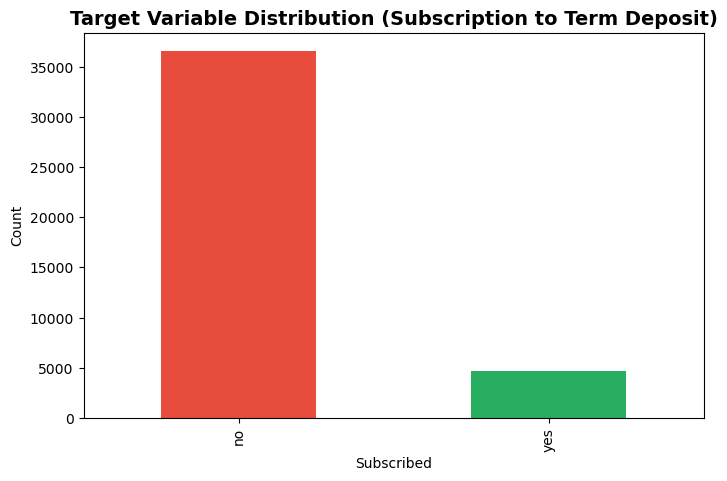

Target Variable Distribution:
y
no     36548
yes     4640
Name: count, dtype: int64

Percentage:
y
no     88.734583
yes    11.265417
Name: proportion, dtype: float64


In [7]:
# Rationale: This better visualises target variable distribution
# This is so that can know what I am working with and then I can see the behaviour of the dataset 
# whether the dataset is imbalanced 

plt.figure(figsize=(8, 5)) # so as to set chart size (width=8, height=5)
ax = df['y'].value_counts().plot(kind='bar', color=['#e74c3c', '#27ae60']) # Red for 'no', Green for 'yes' so accurate representation
plt.title('Target Variable Distribution (Subscription to Term Deposit)', fontsize=14, fontweight='bold') # Title Configuration
plt.xlabel('Subscribed') # X-axis Label
plt.ylabel('Count') # Y-axis Label
plt.show()

# Need to check target variable distribution to understand target better
print("Target Variable Distribution:") 
print(df['y'].value_counts()) # show counts of how many each 

print(f"\nPercentage:")
print(df['y'].value_counts(normalize=True) * 100) # for better understanding and can see how balanced or imbalanced the dataset is 
# Shows how many yes/no in target column

**Interpretation for Target Variable Distribution:**
- From the graph above, I can see that the target variable is **highly imbalanced**: 88.73% "No" vs 11.27% "Yes"
- This means that only approximately 1 in 9 customers subscribe to term deposits (low conversion)
- **Implication for modeling:** 
  - Therefore, this means that accuracy cannot be used as a primary metric (since a model predicting all "No" would achieve 89% accuracy but find 0 subscribers) = HOWEVER KEEP AS SECONDARY METRIC BUT NOT A HUGE MAJOR METRIC
  - Instead, I will be using **F1-Score** to balance precision and recall so that I can get the best of both worlds such that the banks have a good balance between avoiding wasted calls on non-subscribers and not missing potential subscribers
  - In the later part, I will also fix class imbalance using class_weight='balanced' and compute sample weight 

### 2.3.1.2 Understanding distribution of features

### Distrubtion of **Numerical Features**

#### Age Distribution

**Rationale**: 
- Important to understand this feature, since age is a ky demographic that may be influential in the later steps 
- Since it is also potentially true that different age group may have different financial behavious due to different beliefs 
- Will be using a histogram to see the shape better 

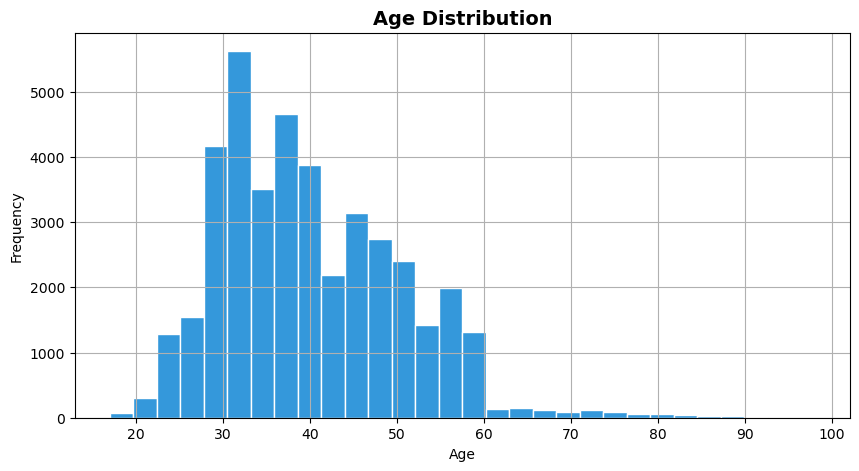

Age range: 17 to 98


In [8]:
# To check age distribution using the hist chart 
plt.figure(figsize=(10, 5)) # Setting the chart size to width=10, height=5 for visual purpose
df['age'].hist(bins=30, color='#3498db', edgecolor='white') # HISTOGRAM to 30 bins to spilt the data 
# in smaller ranges to see SHAPE better 
plt.title('Age Distribution', fontsize=14, fontweight='bold') # Title configuration of histogram 
plt.xlabel('Age') # X-axis Label
plt.ylabel('Frequency') # Y-axis Label
plt.show() # Display histogram

# the min and max found in the data 
print(f"Age range: {df['age'].min()} to {df['age'].max()}")

**Interpretation for Age Distribution:**
- From the graph, I can infer that most customers are aged **30-40 years** (This is the peak working age) -> Analysis made from the rough shape of graph
- Furthermore, distribution is slightly right-skewed with some elderly customers (60+ and above) -> RIGHT SKEWED GRAPH 
- From the graph, I can see that age range spans from 17 to 98 years (taken from the minimum & maximum values)
- **Implication for modeling:**
  - I will create **age_group** feature to capture and categorise the age into different life stages so that it is **easier for model to identify patterns** and could **potentially** be helpful 
  - Different age groups may have different financial behaviors and investment preferences 
  (e.g. Senior customers (46-60) where they have higher earnings and savings may have more disposable income to 
  lock into fixed deposits, while younger customers (18-30) starting their careers may have less savings available to lock away)

#### Previous Contacts Distrubtion 

**Rationale**: 
- This step is necessary since want to see the distribution of contact history from **PREVIOUS** campaigns 
- Since it is from prev campaign using to predict this new campaign, this feature can be used. 
- Furthermore, since it is known BEFORE current campaign, there is no data leakage !!

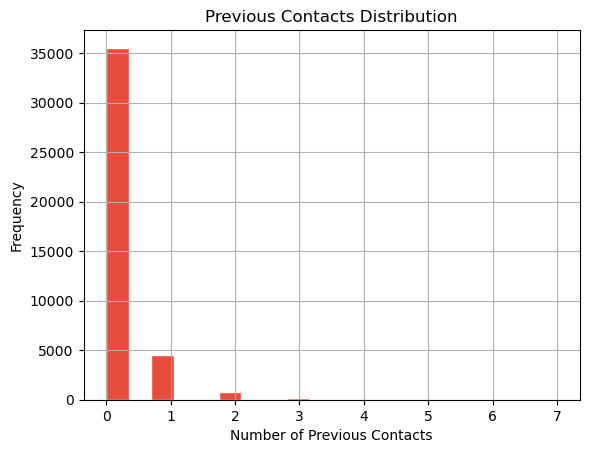

Previous contacts range: 0 to 7

Distribution:
previous
0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64


In [9]:
df['previous'].hist(bins=20, color='#e74c3c', edgecolor='white') # Bins 20 for the range 
plt.title('Previous Contacts Distribution') # Title of histogram 
plt.xlabel('Number of Previous Contacts') # X-axis Label
plt.ylabel('Frequency') # Y-axis Label
plt.show() # Display histogram

# the min and max found in the data and make interpretation
print(f"Previous contacts range: {df['previous'].min()} to {df['previous'].max()}")
print(f"\nDistribution:")
print(df['previous'].value_counts().sort_index())

**Interpretation from Previous Contacts Distribution:**
- From the graph and the value counts, I can see that 35563 out of 41188 customers have **0 previous contacts** (never contacted in past campaigns)
- Furthermore, very few customers have been contacted more than 5 times (only 24 customers)
- Distribution is also heavily right-skewed
- **Implication for modeling:**
  - Previous contact history **may potentially influence** customer response, which is also why it is included as a feature for training as MAYBE A USEFUL FEATURE
  - Will create **contacted_before** feature (binary: 1/0) so that can simplify for model, so that model doesn't deal with various numbers (0,1,2,3), and it is stripped down to just "was contacted before or not" so that model can pick up patten better

#### Pdays Distrubtion 

**Rationale**: 
- This step is necessary since want to see the distribution of last contact from **PREVIOUS** campaigns 
- Special number 999 means customer was not previously contacted 

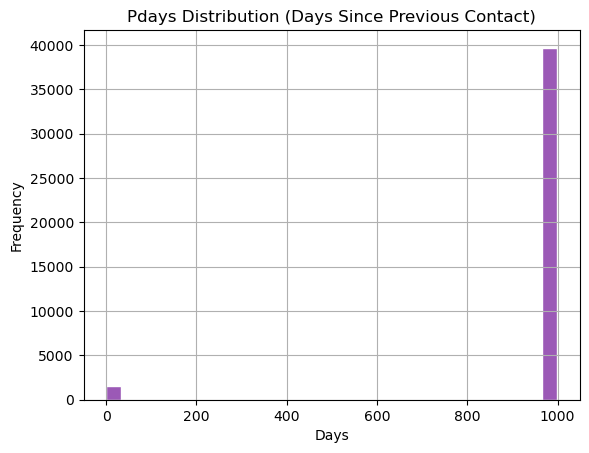

Pdays range: 0 to 999

Customers never contacted (pdays=999): 39673 out of 41188


In [10]:
df['pdays'].hist(bins=30, color='#9b59b6', edgecolor='white') # Bins 30 for the range 
plt.title('Pdays Distribution (Days Since Previous Contact)') # Title of histogram 
plt.xlabel('Days') # X-axis Label 
plt.ylabel('Frequency') # Y-axis Label 
plt.show() # Display histogram 

# the min and max found in the data and make interpretation
print(f"Pdays range: {df['pdays'].min()} to {df['pdays'].max()}")
# customer not contact is anything that is pdays 999 special number
print(f"\nCustomers never contacted (pdays=999): {(df['pdays'] == 999).sum()} out of {len(df)}")

**Interpretation of Pdays Distribution:**
- From the graph, I could see that **Majority of values are 999** (meaning customer was never contacted before)
- From the graph, it was found that only a small portion of customers were contacted recently as well 
- **Implication for modeling:**
  - pdays=999 means that person was never contacted b4
  - I will create **contact_recency** feature with categories: Never, Recent, Medium, Long so that these values can be grouped into meaningful categories instead of the model treating 999 as a large number as that so the model would **NOT THINK that people were contacted 999 days ago**, it has special meaning

#### Economic indicators distribution

**Rationale**: 
- This step is necessary since want to see how economic conditions affect customer financial decision  
- I will be putting all economic indicators as one big spread of graphs so easy to visualise at a glance

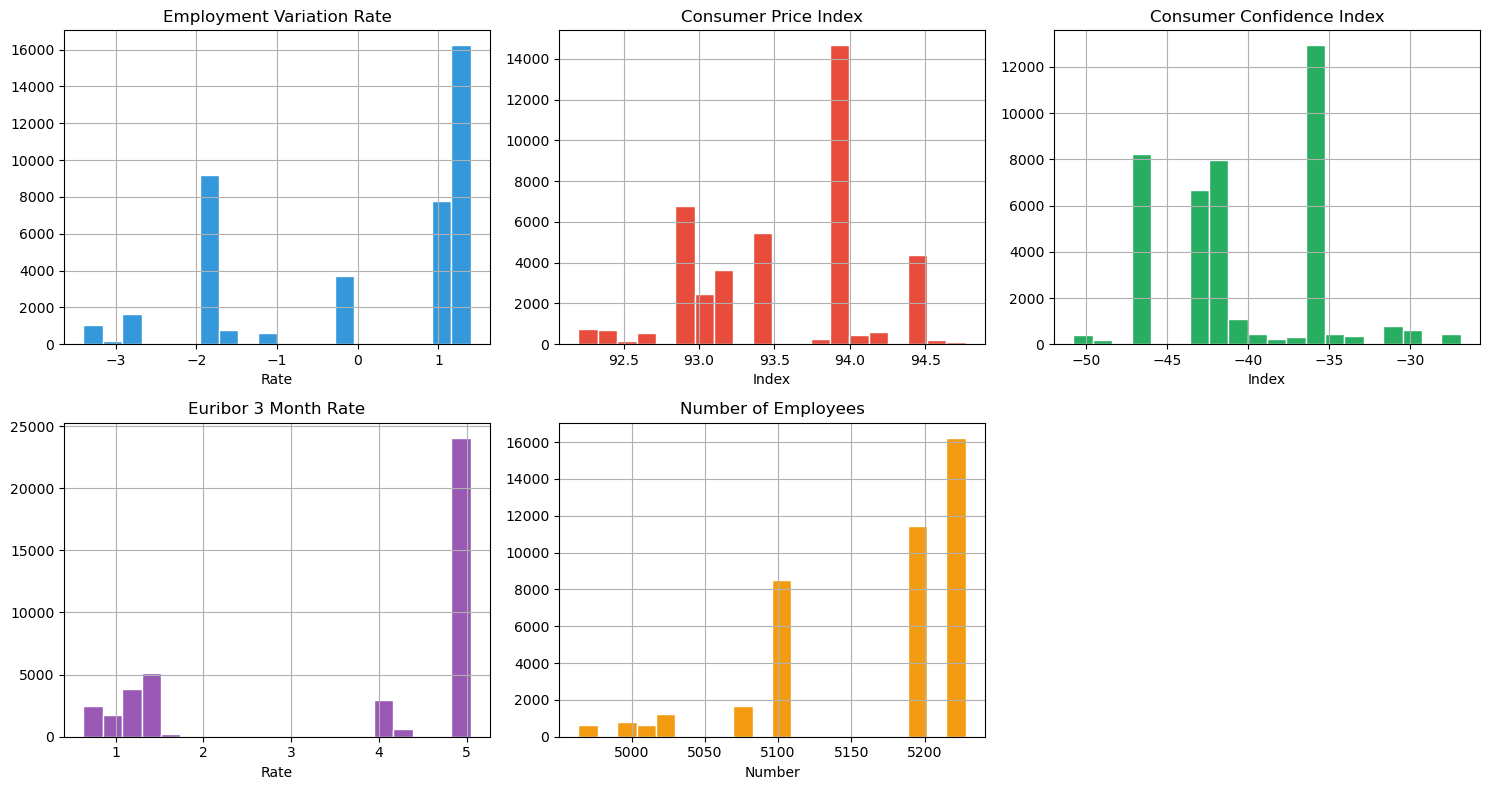

emp.var.rate range: -3.4 to 1.4
cons.conf.idx range: -50.8 to -26.9
euribor3m range: 0.634 to 5.045


In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8)) # Creating the Grid for 2 rows, 3 columns & width=15, height=8 for visual purpose

# 1. employment variation rate, from the datasource, it is how much employment is changing over time
# Rationale: This is important since employment trends may influence customer financial decisions 

df['emp.var.rate'].hist(ax=axes[0,0], bins=20, color='#3498db', edgecolor='white') # first position in grid based on axis 0,0
axes[0,0].set_title('Employment Variation Rate') # Title for subplot
axes[0,0].set_xlabel('Rate') # X-axis Label


# 2. Measure inflation through consumer price index

# Rationale: Important feature since inflation levels may affect purchasing power and investment decisions

df['cons.price.idx'].hist(ax=axes[0,1], bins=20, color='#e74c3c', edgecolor='white') # second position in grid based on axis 0,1
axes[0,1].set_title('Consumer Price Index') 
axes[0,1].set_xlabel('Index')

# 3. Measure how optimistic or pessimistic consumers are regarding the economy

# Rationale: Important to analyse since consumer sentiment may also influence willingness to invest

df['cons.conf.idx'].hist(ax=axes[0,2], bins=20, color='#27ae60', edgecolor='white') # third position in grid based on axis 0,2
axes[0,2].set_title('Consumer Confidence Index')
axes[0,2].set_xlabel('Index')

# 4. Measure the interest rate that banks charge each other

# Rationale: important since euribor rates may affect the interest rates banks offer to customers on deposits which in turn may also 
# affect willingness to subscribe
df['euribor3m'].hist(ax=axes[1,0], bins=20, color='#9b59b6', edgecolor='white') # first position in 2nd row based on axis 1,0
axes[1,0].set_title('Euribor 3 Month Rate') # Title for subplot
axes[1,0].set_xlabel('Rate') # X-axis Label

# 5. Number of employees which essentially means overall employment level in the economy

# Rationale: Important since employment levels reflect economic conditions which may affect investment behaviour
df['nr.employed'].hist(ax=axes[1,1], bins=20, color='#f39c12', edgecolor='white')  # second position in 2nd row based on axis 1,1
axes[1,1].set_title('Number of Employees') 
axes[1,1].set_xlabel('Number')

axes[1,2].axis('off')  # Empty subplot since only have 5 chart but 6 boxes

plt.tight_layout() # so that subplots do not overlap
plt.show() # Display all subplots

# Min and max so that can see more clearly as graph not showing well 
print(f"emp.var.rate range: {df['emp.var.rate'].min()} to {df['emp.var.rate'].max()}")
print(f"cons.conf.idx range: {df['cons.conf.idx'].min()} to {df['cons.conf.idx'].max()}")
print(f"euribor3m range: {df['euribor3m'].min()} to {df['euribor3m'].max()}")

**Interpretation of economic conditions:**
- From the graphs, I can see that economic indicators show variation accross the campaign period meaning that data was collected across different economic conditions
- **emp.var.rate** ranges from negative (job losses) to positive (job gains)
- **cons.conf.idx** is entirely negative so I can infer that consumers were generally pessimistic about the economy during the campaign
- **euribor3m** shows two distinct clusters, suggesting the campaign ran across different interest rate periods
- **Implication for modelling:**
  - I will create **economic_condition** feature combining emp.var.rate and nr.employed to categorise whether the economy was Good, Neutral, or Bad during each contact

### 2.3.2 Understanding relationship between variables

#### Subscription by job (Categorical)

In [ ]:
# Rationale: This is important as different jobs have different income levels & therefore, influence individuals different financial decisions
# e.g. high income jobs more likely to invest in term deposits

# Step 1: Filter customers who subscribed
subscribed = df[df['y'] == 'yes'] # Conditional Statement to filter only 'yes' in target column

# Step 2: Count subscribers by job 
# This is after filtered yes so have only subscribers now
subscribed['job'].value_counts().sort_values().plot(kind='barh', color='#3498db')
plt.title('Number of Subscribers by Job') # Title of bar chart
plt.xlabel('Number of Subscribers') # X-axis Label
plt.ylabel('Job') # Y-axis Label
plt.show() # Display bar chart

# 3. Data Preparation

## 3.1 Data Cleaning

In [ ]:
## Clean data

## 3.2 Train-Test Split

In [ ]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection